# Advanced Epi II: Introduction to Python
## Lesson 7
- Unsupvervised Machine Learning
- Git and GitHub
---
**Unsupervised learning** is a class of machine learning techniques for discovering patterns in data. For instance, finding the natural "clusters" of customers based on their purchase histories, or searching for patterns and correlations among these purchases, and using these patterns to express the data in a compressed form. Unsupervised learning is defined in opposition to supervised learning.

Unsupervised learning is **learning without labels**. It is pure pattern discovery, unguided by a prediction task.

## K-Means clustering

K-Means is a popular **unsupervised machine learning algorithm** used for **clustering** data into **K distinct groups** based on similarity.

![k means](https://media.geeksforgeeks.org/wp-content/uploads/20250114084120247428/k_means_clustering.webp)

Procedure:
1. Choose the number of clusters **$ K $**.
2. Randomly initialize **$ K $** cluster centroids.
3. Assign each data point to the **nearest centroid** (forming clusters).
4. Compute new centroids by averaging points in each cluster.
5. Repeat **until centroids stop changing** (convergence).


In [6]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


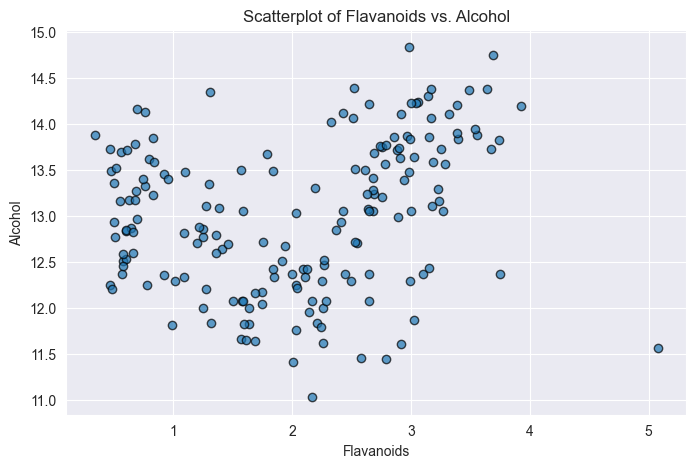

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df["flavanoids"], df["alcohol"], alpha=0.7, edgecolors="k")
plt.xlabel("Flavanoids")
plt.ylabel("Alcohol")
plt.title("Scatterplot of Flavanoids vs. Alcohol")
plt.show()

In [9]:
from sklearn.cluster import KMeans

X = df[["alcohol", "flavanoids"]]
X.shape

(178, 2)

In [10]:
# Applying K-Means clustering with 3 clusters (since Wine dataset has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
df["Cluster"] = kmeans.fit_predict(X)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


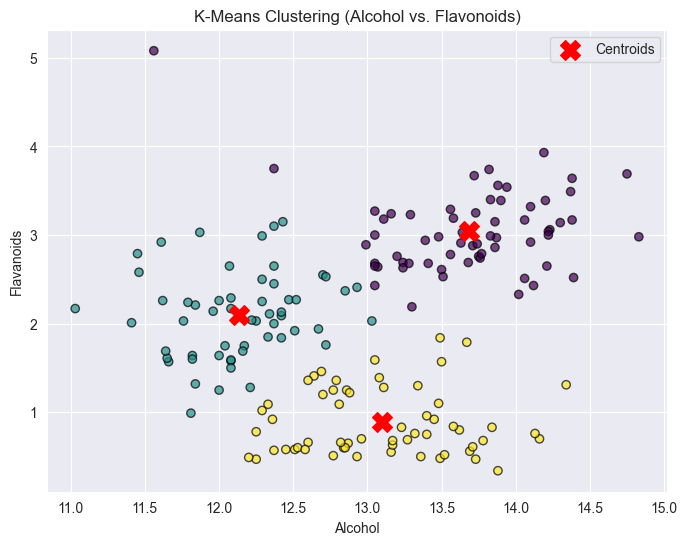

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df["alcohol"], df["flavanoids"], c=df["Cluster"], cmap="viridis", alpha=0.7, edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:, 0], # coordinates x-axis
            kmeans.cluster_centers_[:, 1], # coordinates y-axis
            s=200, # size
            c="red", marker="X", label="Centroids")
plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.title("K-Means Clustering (Alcohol vs. Flavonoids)")
plt.legend()
plt.show()

### Evaluating a clustering
- **Inertia** measures how **spread out the samples within each cluster** are.
- It quantifies **how far** the data points are from their **cluster centroids**.
- **Lower inertia** means **tighter clusters**, which is generally better.

**How is Inertia computed?**
- When you fit a **K-Means model**, the inertia is **automatically calculated**.
- It can be accessed using the `.inertia_` attribute in `sklearn`.


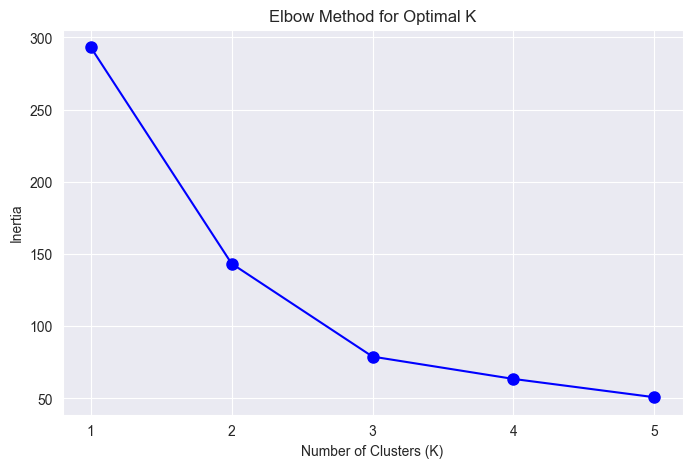

In [12]:
# Define range of K values for Elbow Method
ks = range(1, 6)
inertias = []

# Loop through different K values
for k in ks:
    model = KMeans(n_clusters=k, random_state=42, n_init=10) # Create a KMeans instance with k clusters
    model.fit(X) # Fit model to selected features (Alcohol & Flavonoids)
    inertias.append(model.inertia_) # Append the inertia (sum of squared distances) to the list

# Plot ks vs inertias
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, '-o', markersize=8, color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.xticks(ks)
plt.grid(True)
plt.show()

- A good clustering has low inertia (compact clusters) but not too many clusters.
- Adding more clusters always reduces inertia, but that doesn’t mean it’s a better model!

Too many clusters = Overfitting

Too few clusters = Underfitting

### The Elbow Method
A good rule of thumb: Choose the "elbow" point in an inertia plot. The elbow point is where inertia stops decreasing sharply.

### Transforming features for better clustering
The **variance** of a feature measures the spread of its values. In KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm. To give every feature a chance, the data needs to be transformed so that features have equal variance. This can be achieved with the `StandardScaler` from `scikit-learn`. It transforms every feature to have mean 0 and variance 1.

There's a powerful function which enables to combine multiple steps in modelling: `make_pipeline()`:

In [13]:
# Standardize dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardizing Alcohol & Flavonoids

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [16]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
kmeans = KMeans(n_clusters=3)

pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(X)

Pipeline(steps=[('normalizer', Normalizer()), ('kmeans', KMeans(n_clusters=3))])

In [17]:
df["Cluster_scaled"] = pipeline.fit_predict(X)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster,Cluster_scaled
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


/var/folders/zc/7mjx7d5j2mj_t65nrcs40wkh0000gn/T/ipykernel_94095/70586721.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


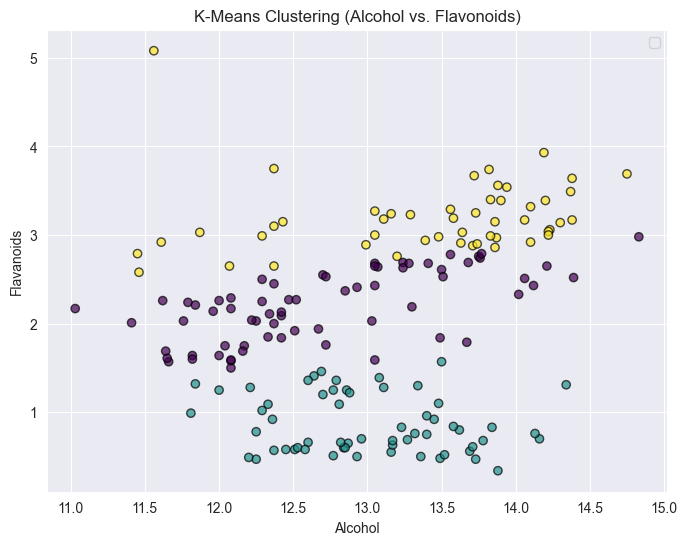

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df["alcohol"], df["flavanoids"], c=df["Cluster_scaled"], cmap="viridis", alpha=0.7, edgecolors="k")
plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.title("K-Means Clustering (Alcohol vs. Flavonoids)")
plt.legend()
plt.show()

### Hierarchical clustering
- Hierarchical clustering is a technique that **organizes data into a hierarchy**.
- It produces a **tree-like structure** called a **dendrogram**, which provides valuable insights into relationships between data points.

**How Hierarchical Clustering Works**
1. Every data point starts as its **own cluster**.
2. The **two closest clusters** are merged at each step.
3. This process continues **until all data points form a single cluster**.

**This method is known as** **agglomerative clustering**. The opposite approach—**divisive clustering**—starts with one large cluster and **splits** it into smaller clusters.

We can use **Scipy's** functions to compute and visualize hierarchical clustering.

In [8]:
import pandas as pd

df = pd.read_csv("eurovision-2016.csv")
df.head(20)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
5,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0
6,Albania,Israel,10,2,18,4,12,8,17,3.0,NaN
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
8,Albania,Sweden,16,8,15,6,15,11,8,NaN,3.0
9,Albania,Germany,18,17,20,11,17,18,15,NaN,NaN


In [9]:
pd.isnull(df).sum()  # Count missing values

From country         0
To country           0
Jury A               0
Jury B               0
Jury C               0
Jury D               0
Jury E               0
Jury Rank            0
Televote Rank        0
Jury Points        646
Televote Points    646
dtype: int64

In [10]:
# Getting the data into shape
df = df.dropna(subset=['Televote Points'])

# Aggregate the total points from the televote per country pair
df['Televote Points'] = df['Televote Points'].astype(int)
pivot_televote = df.pivot_table(index="From country", columns="To country", values="Televote Points", aggfunc="sum", fill_value=0)

# Convert the data into a matrix for cluster analysis
X_televote = pivot_televote.values

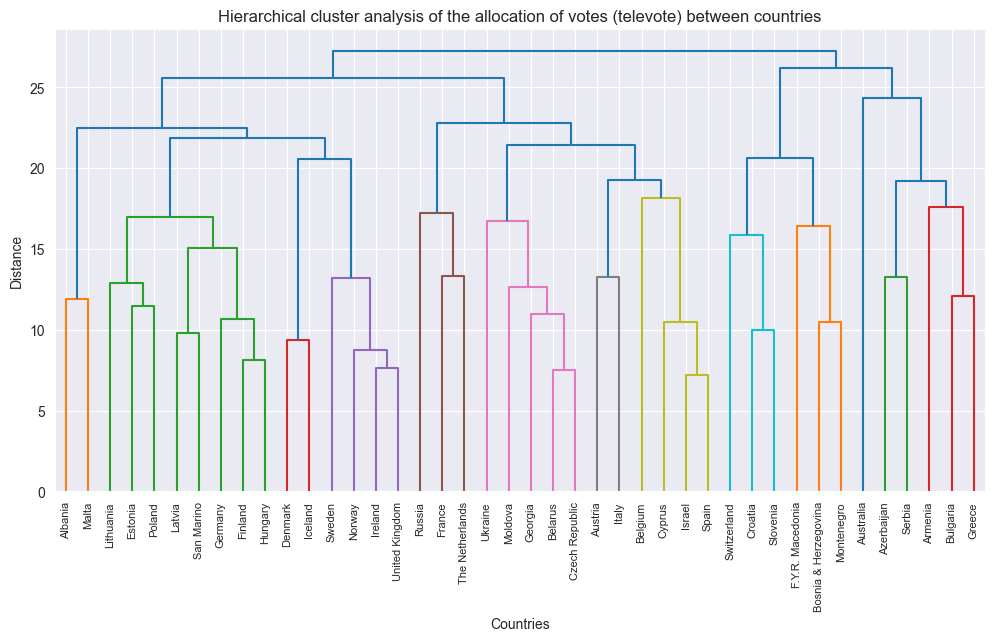

In [11]:
import scipy.cluster.hierarchy as sch

# Create the dendrogram for the hierarchical cluster analysis of the televote points
plt.figure(figsize=(12, 6))
linked_televote = sch.linkage(X_televote, method='complete')

# Draw the dendrogram
sch.dendrogram(linked_televote, labels=pivot_televote.index.tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical cluster analysis of the allocation of votes (televote) between countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

### Extracting Clusters from Hierarchical Clustering

Hierarchical clustering allows us to **extract cluster labels** at different stages of the clustering process. These cluster labels can be used for further analysis, just like those from **K-Means clustering**.

**How to extract intermediate clusters**:
- The **dendrogram’s y-axis** represents the **distance** between merging clusters.
- By **choosing a height (threshold) on the dendrogram**, we can **stop merging clusters** when they are at least that far apart.
- This allows us to extract **clusters at different levels of granularity**.

**What determines cluster merging?**
- The **distance between clusters** is calculated using a **linkage method**.
- In our example, we used **"complete linkage"**, where the **distance between two clusters** is the **maximum distance between their samples**.

**Different linkage methods give different clustering results!**  
For example:
| **Linkage Method** | **Distance Calculation** |
|----------------|----------------|
| **Complete Linkage** | Maximum distance between points in different clusters |
| **Single Linkage** | Minimum distance between points in different clusters |
| **Average Linkage** | Average distance between points in different clusters |
| **Ward’s Method** | Minimizes variance within clusters (default in SciPy) |


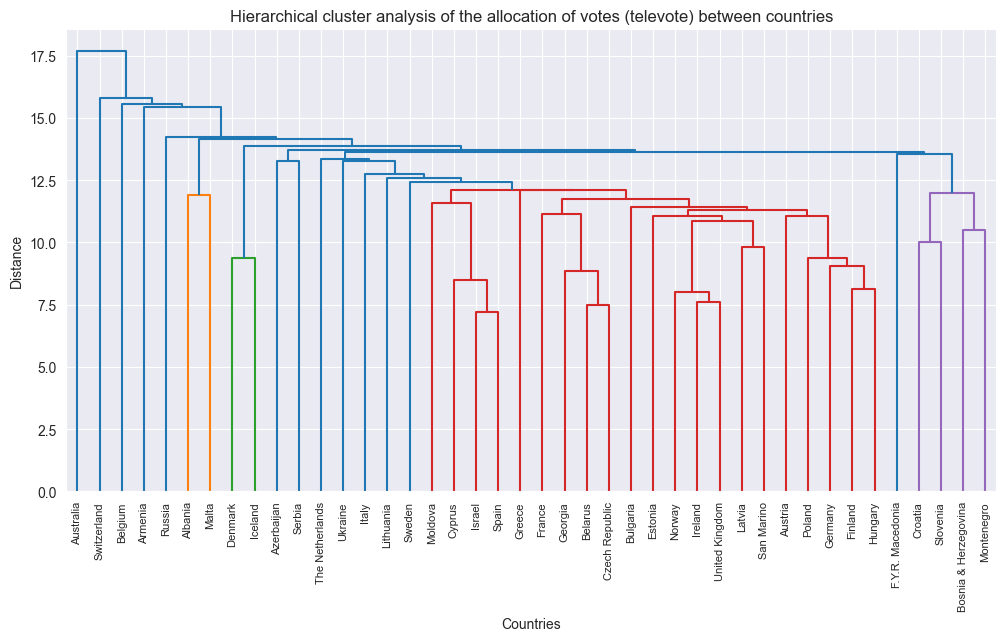

In [12]:
plt.figure(figsize=(12, 6))
linked_televote = sch.linkage(X_televote, method='single')

sch.dendrogram(linked_televote, labels=pivot_televote.index.tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical cluster analysis of the allocation of votes (televote) between countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

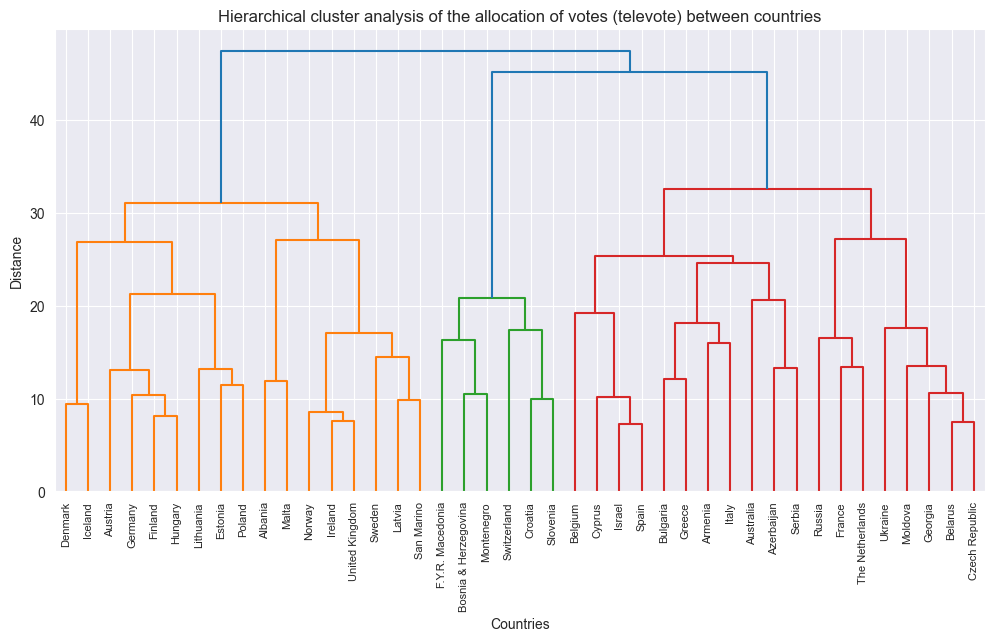

In [13]:
plt.figure(figsize=(12, 6))
linked_televote = sch.linkage(X_televote, method='ward')

sch.dendrogram(linked_televote, labels=pivot_televote.index.tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical cluster analysis of the allocation of votes (televote) between countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

We can use **`fcluster`** to extract cluster labels from an intermediate stage of hierarchical clustering:

In [14]:
# Use fcluster to extract labels: labels
labels = sch.fcluster(linked_televote, t=6, criterion="distance")
print(labels)

[10 30 34  6 32 38 27 18 28 21 26 39  1  7 20  3 35 40  5 29  4  2 12 24
 31 15  9 11 41 19 14  8 37 16 33 22 25 17 23 36 42 13]


## Principal Component Analysis

**Principal Component Analysis (PCA)** is a powerful technique used for **dimensionality reduction**. It transforms a dataset by **removing correlation** between features while preserving as much information as possible. Why is it usefull?
- **Reduces complexity** without losing much information.  
- **Removes redundancy** caused by correlated features.  
- **Improves visualization** by reducing to 2D or 3D.  
- **Prepares data for machine learning** by creating uncorrelated features.

The first step in PCA is **de-correlation**, which **does not reduce the number of dimensions**. PCA **rotates the dataset** so that the new coordinate axes align with the **principal directions of variance**. It also **shifts the data** so that the mean of each feature becomes **zero**.

![PCA theory](https://editor.analyticsvidhya.com/uploads/51304images.png)

Even though the data is rotated, **no information is lost** at this stage!

**Why is it Called "Principal Component Analysis"?**
- PCA learns **the principal components** of the dataset.
- These **principal components** are the **new feature axes**, ordered by how much variance they capture.
- The first principal component captures the **most variance**, the second the next most, and so on.


In [15]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [16]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


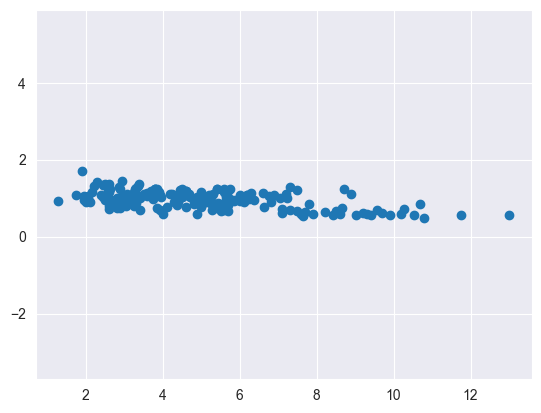

-0.5218131932287575
8.075008429978456e-14


In [17]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

x = df["color_intensity"]
y = df["hue"]

# Scatter plot x vs y
plt.scatter(x, y)
plt.axis('equal')
plt.show()

# Calculate Pearson correlation
correlation, pvalue = pearsonr(x, y)
print(correlation)
print(pvalue)

In [18]:
from sklearn.decomposition import PCA

model = PCA()
pca_features = model.fit_transform(df)

In [19]:
pca_features

array([[ 3.18562979e+02,  2.14921307e+01, -3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00, -6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00,  1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01,  2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01,  1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01,  5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

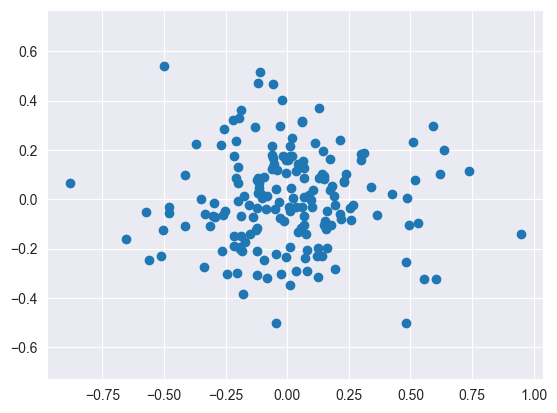

2.0198079320188356e-13


In [20]:
# Assign 9th column (color_intensity) of pca_features: x
x = pca_features[:,9]

# Assign 10th column (hue) of pca_features: ys
y = pca_features[:,10]

# Scatter plot x vs y
plt.scatter(x, y)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of x and y
correlation, pvalue = pearsonr(x, y)

# Display the correlation
print(correlation)

The **intrinsic dimension** of a dataset is the **minimum number of features needed to approximate it**.  
- It represents the **true complexity** of the dataset.  
- If a dataset has **high redundancy** (e.g., correlated features), its **intrinsic dimension is lower** than its actual number of features.  

**Why does this matter?**  
- The **intrinsic dimension determines how much a dataset can be compressed** without significant information loss.  
- This helps guide **dimensionality reduction techniques like PCA**.

PCA **rotates and shifts** the dataset to align it with new coordinate axes. After transformation, **each new axis (PCA component) captures a certain amount of variance**. **The intrinsic dimension is the number of PCA components with high variance**.

![PCA how it works 2](https://assets.datacamp.com/production/repositories/655/datasets/07c71a3cd0864158143953140046b72e54ef8f38/versicolor_pca.png)

**This is important because it**:
- Helps determine the **optimal number of features** to keep in a dataset.  
- Reduces unnecessary complexity, improving **computational efficiency**.  
- Enhances **machine learning model performance** by eliminating redundant data. 

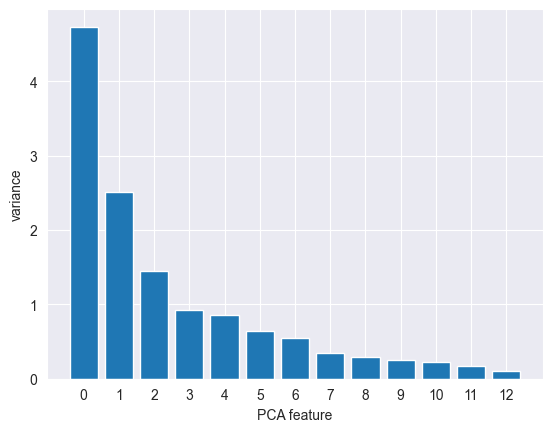

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Dimension reduction
Dimension reduction **represents the same dataset using fewer features** while retaining essential information.  
It is **crucial** in machine learning pipelines, especially when working with **real-world data** that often contains **redundant or noisy features**.

**How PCA Performs Dimension Reduction**:
- PCA **ranks features by variance** and assumes:
  - **Low-variance components** = Mostly **noise** → **Discard**
  - **High-variance components** = **Informative** → **Keep**
- By **removing low-variance PCA features**, PCA **compresses the dataset** without significant information loss.

**Choosing the Number of PCA Components**:
To use PCA for dimension reduction, you must **decide how many PCA components to keep**:
1. **Keep enough components to retain most of the variance**.
2. **Discard components that contribute little to the overall data structure**.
3. **Use explained variance to guide selection**.

In [23]:
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=3)

pca.fit(df)

# Transform df: pca_features
pca_features = pca.transform(df)

# Print the shape of pca_features
print(pca_features.shape)
pca_features

(178, 3)


array([[ 3.18562979e+02,  2.14921307e+01, -3.13073470e+00],
       [ 3.03097420e+02, -5.36471768e+00, -6.82283550e+00],
       [ 4.38061133e+02, -6.53730945e+00,  1.11322298e+00],
       [ 7.33240139e+02,  1.92729032e-01,  9.17257016e-01],
       [-1.15714285e+01,  1.84899946e+01,  5.54422076e-01],
       [ 7.03231192e+02, -3.32158674e-01, -9.49375334e-01],
       [ 5.42971581e+02, -1.35189666e+01, -2.12694283e+00],
       [ 5.48401860e+02,  1.14494324e+01, -4.04924202e-02],
       [ 2.98036863e+02, -8.18015784e+00, -3.88097517e+00],
       [ 2.98049553e+02, -7.10154294e+00, -1.55845533e+00],
       [ 7.63079712e+02, -8.33431723e+00,  1.88629037e+00],
       [ 5.32943228e+02, -1.42876338e+01, -1.30335240e-01],
       [ 5.72834410e+02, -2.10050143e+01, -3.72614859e-01],
       [ 4.02925358e+02, -1.61026352e+01, -5.67513986e+00],
       [ 8.00053394e+02, -1.21184472e+01, -3.04652991e+00],
       [ 5.63245578e+02,  2.21482866e+00,  5.25510985e-01],
       [ 5.33379651e+02,  1.08048022e+01

## Git

Git is a **version control system** (VCS). It helps track changes in files and coordinate work between multiple people. Git was designed to handle the development of large software projects, but its use cases go far beyond programming. Today, Git is widely used in **data science, scientific research, documentation writing**, and **collaborative work** of any kind.

> Analogy: Think of Git like the “Undo” button in Word, but much more powerful. You can see what changed, who changed it, when, and why.

Git operates **locally on your computer**, which means you can use it even without an internet connection. However, Git is often used together with **remote repositories** hosted on platforms like **GitHub**, **GitLab**, or **Bitbucket**, allowing you to back up your work, collaborate with others, and manage contributions in a structured and transparent way.

**What Can You Do with Git?**
- **Track every change** in your project: What changed, who changed it, and why.
- **Restore previous versions** of your code or data.
- **Work on new features safely** without touching the main version, using branches.
- **Collaborate with others** without overwriting each other's work.
- **Sync your code** between different machines or team members.
- **Document your progress** with meaningful commit messages.

In short, Git is one of the most powerful tools you can learn—not just to protect your work, but to **organize your projects, collaborate efficiently**.



A common method to use Git is via the shell, also known as the terminal.

To see our location, we can execute pwd, which prints the current working directory:

In [ ]:
pwd # location of working directory

In [ ]:
ls # content of working directory

In [ ]:
cd L3 # change directory to a specific directory

In [ ]:
git --version # check git version

To use Git for version control in our project, we first need to create a **Git repository**, often referred to as a **repo**. A repo is a directory consisting of two parts:
1. The files and sub-directories that we create and edit
2. The extra information that Git records about the project's history

Git stores all of its extra information in a directory called `.git`, located in the repo's main directory. Git expects this information to be laid out in a particular way, so we should not edit or delete `.git`.

In [ ]:
git init name of project # initialize a new project

In [ ]:
cd name of project # change working directory to new project

This command shows you what has changed in your working directory since the last commit:
- Which files are untracked (i.e., Git doesn't know about them yet)?
- Which files have been changed but not yet staged?
- Which files are staged and ready to be committed?

In [ ]:
git status 

Converting an existing project into a repo:

In [ ]:
git init # run this command inside your project

In [ ]:
git status

The **Git workflow**:
1. Edit and save one or more files to our computer, as usual.
2. **Add files to the Git stating area**. The staging area is created when we initialize a Git repository and it keeps track of what has been modified.
3. To save the files using Git, we make a **commit**. When we make a commit, Git will take a snapshot of the files at that point in time.

We can think of adding files to the staging area as placing a letter in an envelope. By contrast, making a commit is like putting the envelope in a mailbox. We can add more things to the envelope or take things out as often as we want, but once we put it in the mailbox, we can't make further changes.

In [ ]:
git add README.md # add a single file

In [ ]:
git add . # add all the files of a directory

In [ ]:
git status

In [ ]:
git commit

In [ ]:
git commit -m "File added" # Always write a meaningful commit message to explain what changed

It is important to unterstand, how Git is storing data. **Git stores data through commits, which have three parts**: 
1. **The commit** contains metadata such as the author, log message, and commit time.
2. **The tree** tracks the names and locations of files and directories when that commit happened. Think of it like a dictionary, with keys represented as unique identifiers, mapping to files or directories.
3. **Blobs**: For each file in the tree, there is a blob, which means **binary large object**. A blob may contain data of any kind. Blobs contain a compressed snapshot of the file's contents when the commit happened.

A unique identifier called a **hash** is a 40-character string of numbers. It is called a hash because Git produces it using a pseudo-random number generator called a hash function. **Hashes enable Git to share data efficiently between repos**. If two files are the same, their hashes will be the same. Therefore, Git can tell what information needs to be saved in which location by comparing hashes rather than entire files.

![git command visualization](Screenshot%202025-03-23%20at%2013.58.55.png)

In [ ]:
git log # shows commits from newest to oldest

If the output doesn't fit in the terminal window, a colon will be at the end, indicating more commits. We can see more by pressing the `space bar`. To exit the log, we can press `q` and return to the terminal. The more complex your project is, the more unclear your log output will be. We have a few options for customizing the git log output. **There are several options to restrict your git log output**:

In [ ]:
git log -3 # show the changes of the last 3 commits

In [ ]:
git log file.md # restrict the output to a specific file

In [ ]:
git log -2 file.md # show the last 2 changes of a specific file

In [ ]:
git log --since="Month Day Year" 

In [ ]:
git log --since="Apr 2 2024" --until="Apr 11 2024" # show changes of a specific time range

The `since` and `until` flags are very flexible in the date and time formatting that they accept. Acceptable examples:
- `2 weeks ago`
- `3 months ago`
- `yesterday`
- `07-15-2024`

In [ ]:
# finding a particular commit
git log
git show c27fa856

![track a specific command output](Screenshot%202025-03-23%20at%2014.22.37.png)

A diff is how git shows us the difference between versions:
- A is the last version that has been committed, B ist the version still need to be add to the staging area. B will be the newest version.
- The line starting with two at symbols tells us what changed between the two versions
- The minus 48 and 3 indicate that version A starts at line 48 and has 3 lines, and the plus 48 and 4 show that version B starts at line 48 and has 4 lines.
- The green text indicates what we added in the newest version B, which is not in version A.


In [ ]:
git diff file.md # compare last committed version with latest version not in the staging area

In [ ]:
git diff --staged file.md # compare last committed version of a file with the version in the staging area

In [ ]:
git diff --staged # compare all staged files to versions in the last commit

In [ ]:
# compare two commits
## option 1
git log
git diff 35f4b4d 186398f # to compare what changed from first hash to second hash, put most recent hash second

In [ ]:
## option 2
git diff HEAD~1 HEAD~2 # compare second most recent with the most recent commit

To restore a file to its state before, we use the `git revert`command, which resinstates previous versions of files and creates a new commit with these older versions. Note  that it will restore all the files updatet in that commit. We need to provide a reference (through a commit has or HEAD) to the changes that we want to undo.

In [ ]:
git revert HEAD # Save via CTRL + 0 and Enter, Exit via CTRL + X

In [ ]:
git revert --no-edit HEAD # avoid opening the text editor

In [ ]:
git revert -n HEAD # revert without committing (bring files into the staging area)

`git revert` works on commits, not individual files. Ff we had updated more files, then those would have been reverted, too. To revert a single file, we need a different command:

In [ ]:
git checkout # allows us to check out one or more files from a specific commit

In [ ]:
git checkout HEAD~1 -- file.md # refer to the second most recent commit and narrow the command to a single file by including -- and the filename

In [ ]:
git status # confirm the file has been modified to its previous state and is in the staging area by running git status

In [ ]:
git commit -m "message" # make a new commit to save the file's latest state

If we need to restore a file in the staging area before the update has been committed, we need to remove this from the staging area or unstage it is back in the repo:

In [ ]:
git restore --staged unstaged_file.csv # moves the file back to the working directory, allowing us to edit before restaging and committing

In [ ]:
git restore --staged # move all files in the staging area back to the repo

## Final Assignment Submission Guide

To submit your final assignment for *Advanced Epidemiology II*, please follow the steps below carefully. You will be working with the GitHub repository provided:

**Repository Link**:  
https://github.com/ariee-24/Advanced_Epi_II_2024-25/tree/fad0ff20d41a3c88e0c14628a9ef779c946e91a4

We will be using the GitHub workflow that includes:
- Forking the repository
- Cloning your fork
- Creating a new folder for your assignment
- Committing and pushing your work
- Submitting a pull request (PR)

---

### Step 1: Fork the Repository

1. Open the link to the repository:
   https://github.com/ariee-24/Advanced_Epi_II_2024-25

2. In the top right corner, click the **“Fork”** button.
3. This will create **your own copy** of the repository under your GitHub account.

---

### Step 2: Clone Your Fork

Now you will **copy the repository to your local machine**.

1. Open your forked repository (under your GitHub username).
2. Click the green **"Code"** button and copy the **HTTPS URL**.
   It should look something like:
   https://github.com/yourusername/Advanced_Epi_II_2024-25.git
3. Open your terminal and run:
```bash
git clone https://github.com/yourusername/Advanced_Epi_II_2024-25.git
cd Advanced_Epi_II_2024-25
```

---

### Step 3: Create Your Assignment Folder

1. Inside the cloned repository, create a folder with the following naming convention: `lastnames_firstnames/`
2. Inside this folder, place your final assignment Jupyter Notebook (e.g., `final_assignment.ipynb`) and any additional files you want to submit.
3. Alternatively, you can create the folder manually or via terminal:
```bash
mkdir lastname_firstname
mv your_assignment.ipynb lastnames_firstnames/
```

---

### Step 4: Stage and Commit Your Changes

1. Check the changes via
```bash
git status
```
2. Add your folger and its contents
```bash
git add lastnames_firstnames/
```
3. Commit with a clear message
```bash
git commit -m "Add final assignment for Lastnanmes Firstnames"
```

---

### Step 5: Push to Your GitHub Fork
```bash
git push origin main
```

### Step 6: Create a Pull Request

1. Go to your forked repo on GitHub
2. Click the "Contribute" button -> "Open Pull Request"
3. Choose:
    - base repository: `username/Advanced_Epi_II_2024-25`
    - base branch: `main`
    - head repository: your fork
    - compare branch: `main`
4. Add a short description like:
> "Submitting final assignment - Lastnames Firstnames"
5. Click "Create Pull Request"


